In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/compas-scores-two-years.csv")
df = df[df["days_b_screening_arrest"] <= 30]
df = df[df["days_b_screening_arrest"] >= -30]
df.drop([
    "id",
    "name",
    "first",
    "last",
    "dob",
    "violent_recid",
    "decile_score.1"
], axis=1, inplace=True)
df.head()

,compas_screening_date,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,2013-08-14,Male,69,Greater than 45,Other,0,1,0,0,0,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,2013-01-27,Male,34,25 - 45,African-American,0,3,0,0,0,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,2013-04-14,Male,24,Less than 25,African-American,0,4,0,1,4,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
5,2013-11-30,Male,44,25 - 45,Other,0,1,0,0,0,...,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,2014-02-19,Male,41,25 - 45,Caucasian,0,6,0,0,14,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1


In [4]:
print(df["age_cat"].unique())
print(df["race"].unique())
print(sorted(df["decile_score"].unique()))
print(sorted(df["juv_other_count"].unique()))
print(df["score_text"].unique())
print(df["event"].unique())
print(df["is_recid"].unique())

['Greater than 45' '25 - 45' 'Less than 25']
['Other' 'African-American' 'Caucasian' 'Hispanic' 'Asian'
 'Native American']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 9]
['Low' 'Medium' 'High']
[0 1]
[0 1]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6172 entries, 0 to 7213
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   compas_screening_date    6172 non-null   object 
 1   sex                      6172 non-null   object 
 2   age                      6172 non-null   int64  
 3   age_cat                  6172 non-null   object 
 4   race                     6172 non-null   object 
 5   juv_fel_count            6172 non-null   int64  
 6   decile_score             6172 non-null   int64  
 7   juv_misd_count           6172 non-null   int64  
 8   juv_other_count          6172 non-null   int64  
 9   priors_count             6172 non-null   int64  
 10  days_b_screening_arrest  6172 non-null   float64
 11  c_jail_in                6172 non-null   object 
 12  c_jail_out               6172 non-null   object 
 13  c_case_number            6172 non-null   object 
 14  c_offense_date           5388

<Axes: ylabel='Frequency'>

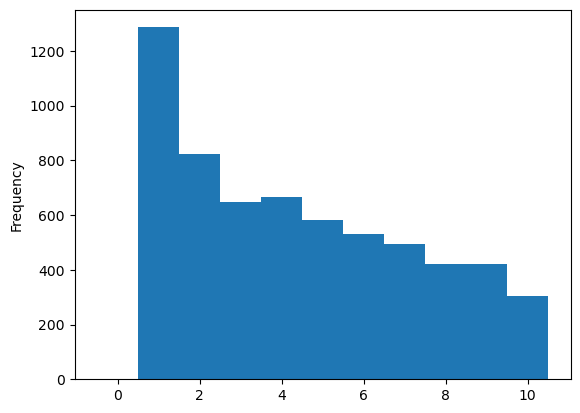

In [10]:
df["decile_score"].plot(kind="hist", bins=np.arange(-0.5, 11, 1))

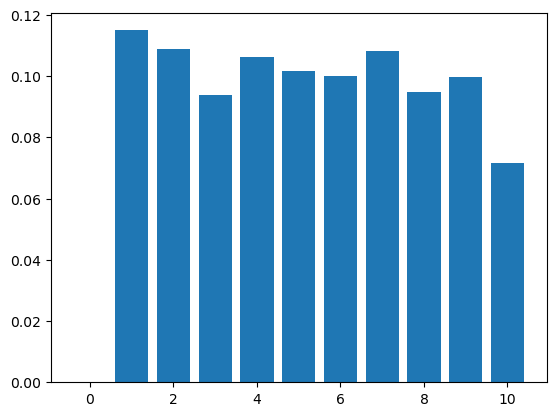

In [37]:
def histogram(kolonne, gruppe):
    temp_df = df.where(df[kolonne] == gruppe)
    temp_df.dropna(subset=kolonne, inplace=True)
    h = np.histogram(temp_df["decile_score"], bins=np.arange(-0.5, 11, 1))[0]
    h = np.asarray(h, dtype=float)
    h /= h.sum()
    plt.bar(np.arange(0, 11, 1), h)

histogram("race", "African-American")